In [1]:
%matplotlib inline

from __future__ import division
import numpy as np
import pandas as pd
from matplotlib import rcParams
from patsy import dmatrices, dmatrix

import Quandl
import matplotlib.pyplot as plt
import seaborn as sns

from api_key import token

In [2]:
nugt_df = Quandl.get("GOOG/NYSEARCA_NUGT", authtoken=token)
dust_df = Quandl.get("GOOG/AMEX_DUST", authtoken=token)

In [8]:
nugt_df = nugt_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)
dust_df = dust_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

ValueError: labels ['Open' 'High' 'Low' 'Volume'] not contained in axis

In [11]:
nugt_df['DailyReturn'] = (nugt_df.Close-nugt_df.Close.shift(1))/nugt_df.Close.shift(1)
dust_df['DailyReturn'] = (dust_df.Close-dust_df.Close.shift(1))/dust_df.Close.shift(1)

array(['2010-12-07T19:00:00.000000000-0500',
       '2010-12-08T19:00:00.000000000-0500',
       '2010-12-09T19:00:00.000000000-0500', ...,
       '2016-02-17T19:00:00.000000000-0500',
       '2016-02-18T19:00:00.000000000-0500',
       '2016-02-21T19:00:00.000000000-0500'], dtype='datetime64[ns]')

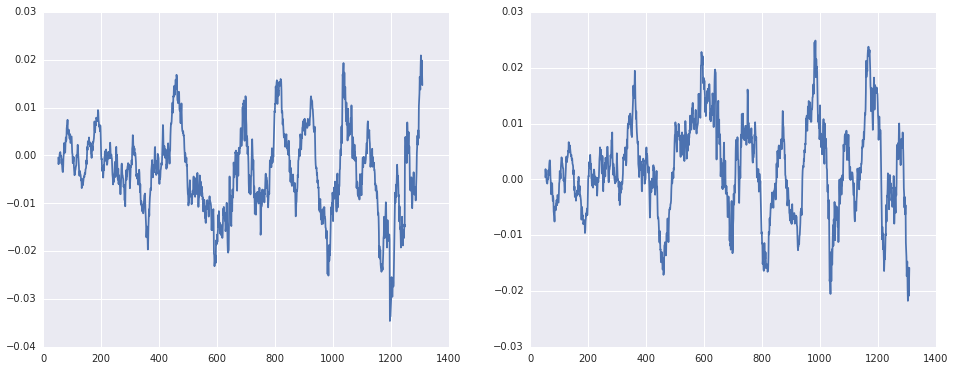

In [22]:
rcParams['figure.figsize'] = (16, 6)
plt.subplot(121)
plt.plot(pd.rolling_mean(nugt_df.DailyReturn,52))
plt.subplot(122)
plt.plot(pd.rolling_mean(dust_df.DailyReturn, 52))
nugt_df.index.values

In [21]:
pearsons_r = np.corrcoef(nugt_df.DailyReturn.dropna(), dust_df.DailyReturn.dropna())[0][1]
print 'Pearson\'s r:', pearsons_r

Pearson's r: -0.941413221728
